In [1]:
import os, random
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

from dGbyG.config import train_data_path
from dGbyG.utils.custom_tools import rapid_linear_reg

In [2]:
color1 = (100/256,170/256,220/256)
color2 = (241/256,183/256,39/256)
color3 = (162/256,205/256,133/256)
color4 = (256/256,130/256,210/256)
color5 = (139/256,139/256,255/256)

label_fs = 10
legend_fs = 10

10-fold cross validation results

In [5]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation/'
R = []
Final_p = []
for n in range(100):
    name = os.path.join(results_dir, str(n))
    idx = np.load( name+'.npy').mean(axis=0).argmin()
    res = pd.read_csv(name+'.csv', index_col=0)
    try:
        real_r
    except:
        real_r = res.loc[:,'standard_dg_prime']
    assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
    R.append(res.loc[:,'r'].to_numpy())
    Final_p.append(res.loc[:,str(idx)].to_numpy())

p = np.mean(Final_p, axis=0)
e = p - real_r
ae = np.abs(e)

rapid_linear_reg(real_r, p)
print('Medain of absolute error:', np.median(ae))
print('Mean of absolute error:', np.mean(ae))
print('RMSE:', np.mean(ae**2)**0.5)

The linear model is: Y = -1.4792 + 0.99504X
PearsonRResult(statistic=0.9975875091064352, pvalue=0.0)
SignificanceResult(statistic=0.9293318309764578, pvalue=2.102580003885178e-293)
Medain of absolute error: 4.110047962719532
Mean of absolute error: 8.581318770363126
RMSE: 24.62306863884449


10-fold cross validation results of unweighing

In [4]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_unweighing/'

Final_p_unweigh = []
for n in range(100):
    name = os.path.join(results_dir, str(n))
    idx = np.load( name+'.npy').mean(axis=0).argmin()
    res = pd.read_csv(name+'.csv', index_col=0)
    assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
    
    Final_p_unweigh.append(res.loc[:,str(idx)].to_numpy())

p_unweigh = np.mean(Final_p_unweigh, axis=0)
e_unweigh = p_unweigh - real_r
ae_unweigh = np.abs(e_unweigh)

rapid_linear_reg(real_r, p_unweigh)
print('Medain of absolute error:', np.median(ae_unweigh))
print('Mean of absolute error:', np.mean(ae_unweigh))
print('RMSE:', np.mean(ae_unweigh**2)**0.5)

The linear model is: Y = -1.5081 + 0.99493X
PearsonRResult(statistic=0.9975062267196597, pvalue=0.0)
SignificanceResult(statistic=0.9270985461955219, pvalue=5.02849696332105e-289)
Medain of absolute error: 4.173827259630233
Mean of absolute error: 8.749483834350485
RMSE: 25.033955698451553


10-fold cross validation results without random error

In [5]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_without_random_dG/'

Final_p_no_rand = []
for n in range(100):
    name = os.path.join(results_dir, str(n))
    idx = np.load( name+'.npy').mean(axis=0).argmin()
    res = pd.read_csv(name+'.csv', index_col=0)
    assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
    
    Final_p_no_rand.append(res.loc[:,str(idx)].to_numpy())

p_no_rand = np.mean(Final_p_no_rand, axis=0)
e_no_rand = p_no_rand - real_r
ae_no_rand = np.abs(e_no_rand)

print('Medain of absolute error:', np.median(ae_no_rand))
print('Mean of absolute error:', np.mean(ae_no_rand))
print('RMSE:', np.mean(ae_no_rand**2)**0.5)

Medain of absolute error: 3.9811389660376992
Mean of absolute error: 8.49927625834316
RMSE: 24.28502542326965


10-fold cross validation results of unweighing and without random error

In [6]:
results_dir = '../data/results_data/cross_validation_results/10_fold_cross_validation_unweighing_without_random_dG/'

Final_p_unweigh_no_rand = []
for n in range(100):
    name = os.path.join(results_dir, str(n))
    idx = np.load( name+'.npy').mean(axis=0).argmin()
    res = pd.read_csv(name+'.csv', index_col=0)
    assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
    
    Final_p_unweigh_no_rand.append(res.loc[:,str(idx)].to_numpy())

p_unweigh_no_rand = np.mean(Final_p_unweigh_no_rand, axis=0)
e_unweigh_no_rand = p_unweigh_no_rand - real_r
ae_unweigh_no_rand = np.abs(e_unweigh_no_rand)

print('Medain of absolute error:', np.median(ae_unweigh_no_rand))
print('Mean of absolute error:', np.mean(ae_unweigh_no_rand))
print('RMSE:', np.mean(ae_unweigh_no_rand**2)**0.5)

Medain of absolute error: 4.199564304368925
Mean of absolute error: 8.725681500538622
RMSE: 24.80588453278934


Fig 2. a

In [237]:
def resample_median(x, k, n):
    def resample(x, k):
        y = random.sample(x, k)
        y = np.mean(y, axis=0)
        return y
    e = np.array([resample(x, k) for _ in range(n)]) - real_r
    mae = np.median(np.abs(e), axis=1)
    return mae

k, n = 10, 50

data = [Final_p_unweigh_no_rand, Final_p_unweigh, Final_p_no_rand, Final_p]
data = [resample_median(x, k, n) for x in data]

0 1
LeveneResult(statistic=0.03132194263585623, pvalue=0.8598893060483396)
Ttest_indResult(statistic=0.8789070685106387, pvalue=0.38160160548766253)

0 2
LeveneResult(statistic=0.13537547388187632, pvalue=0.7137158935940849)
Ttest_indResult(statistic=9.353725136367924, pvalue=3.0604339675969226e-15)

0 3
LeveneResult(statistic=2.8364047004423463, pvalue=0.0953327756650041)
Ttest_indResult(statistic=10.239558872310418, pvalue=3.6576819544936595e-17)

1 2
LeveneResult(statistic=0.30705377459937294, pvalue=0.5807560260540647)
Ttest_indResult(statistic=8.407010180785473, pvalue=3.408105552756964e-13)

1 3
LeveneResult(statistic=3.5626561413623388, pvalue=0.06205205271496548)
Ttest_indResult(statistic=9.223235978288791, pvalue=5.872612636776705e-15)

2 3
LeveneResult(statistic=1.8265798845601946, pvalue=0.1796435454570654)
Ttest_indResult(statistic=0.27634756692075124, pvalue=0.7828630849360008)



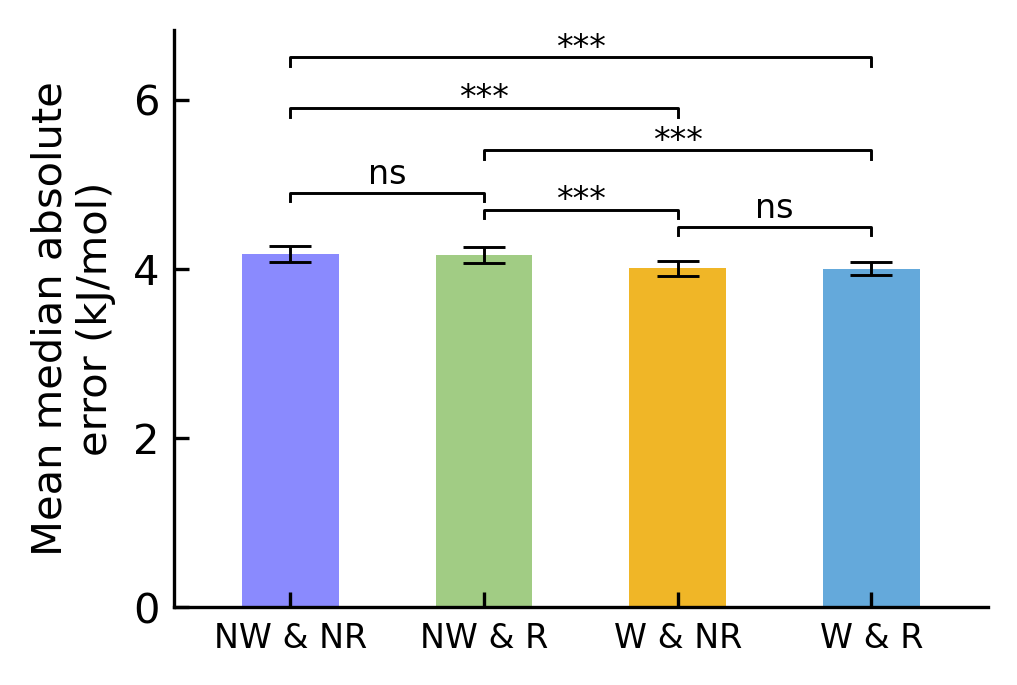

In [315]:
plt.figure(dpi=300,figsize = (3.5,2.5))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

err_params=dict(elinewidth=0.7, ecolor='black', capsize=5, capthick=0.7)

height=[np.mean(x) for x in data]
yerr=[np.std(x) for x in data]
colors = [color5, color3, color2, color1]
labels = ['NW & NR', 'NW & R', 'W & NR', 'W & R']

plt.bar(x=[0,1,2,3],height=height, width=0.5, edgecolor='none', color=colors, 
        yerr=yerr, error_kw=err_params)


for x in range(len(data)):
    for y in range(x+1, len(data)):
        ttest = scipy.stats.ttest_ind(data[x], data[y])
        dh = 0.1
        if ttest[1]>0.05:
            sign = 'ns'
            dh = 0.2
        elif ttest[1]>0.01:
            sign = '*'
        elif ttest[1]>0.001:
            sign = '**'
        else:
            sign = '***'
        print(x,y)
        print(scipy.stats.levene(data[x], data[y]))
        print(ttest)
        print()
        h = 4.8-x/5 if (y-x)==1 else 4.2-x/5*2.5+(y-x)*0.8-(y-x-2)*0.2

        plt.plot([x,x,y,y], [h,h+0.1,h+0.1,h], c='black', linewidth=0.7)
        plt.text(x=0.5*(y+x), y=h+dh, s=sign, fontsize=8, ha='center')

plt.xticks(ticks=[0,1,2,3], labels=labels, fontsize=8)
plt.yticks(fontsize=10)

plt.ylabel('Mean median absolute\nerror (kJ/mol)', fontsize=10, labelpad=4)

plt.xlim(-0.6,3.6)
plt.show()


The linear model is: Y = -1.4792 + 0.99504X
PearsonRResult(statistic=0.9975875091064352, pvalue=0.0)
SignificanceResult(statistic=0.9293318309764578, pvalue=2.102580003885178e-293)


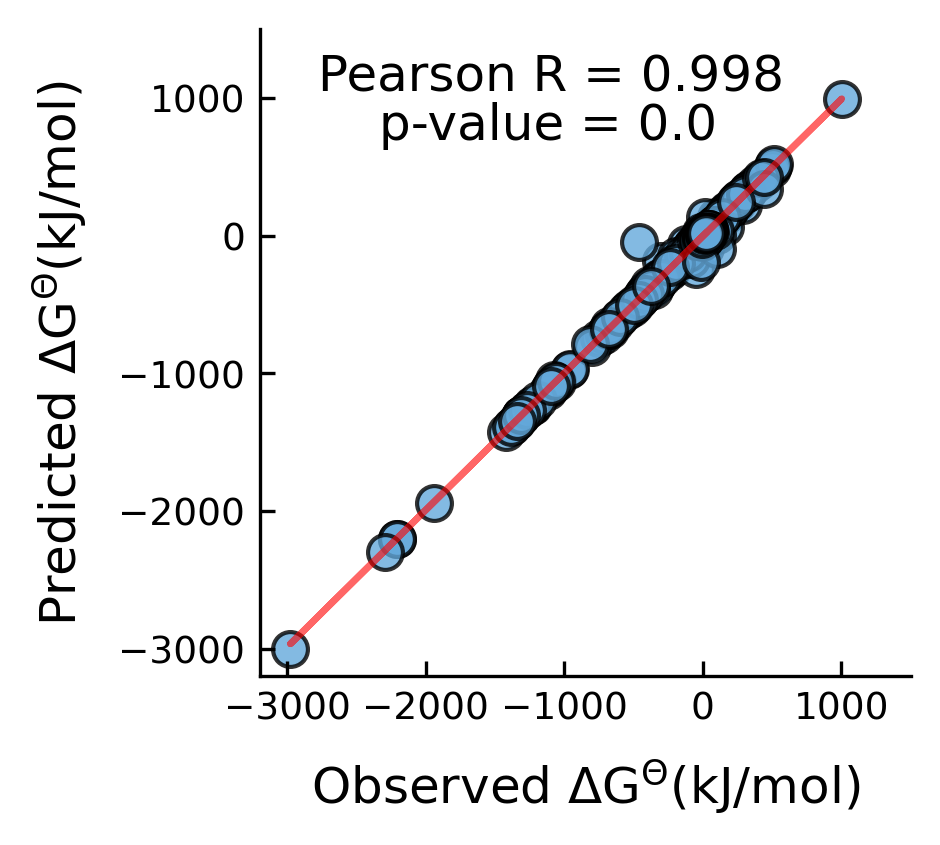

In [7]:
x = real_r
y = p
fit_y, pr, sr = rapid_linear_reg(x, y)

plt.figure(dpi=300, figsize=(2.8,2.8))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
lable_fs = 17
title_fs = 20

plt.scatter(x, y, color=color1, marker='o', alpha=0.8, edgecolors='black', s=70)
plt.plot(x, fit_y,c = 'red',linewidth=1.6 , alpha = 0.6)

plt.text(x=-2780, y=1050, s='Pearson R = {0}'.format(np.around(pr[0], decimals=3)), fontsize = 12)
plt.text(x=-2335, y=700, s='p-value = {0}'.format(np.around(pr[1], decimals=3)), fontsize = 12)

plt.xticks(range(-3000, 1300, 1000), fontsize=9)
plt.yticks(range(-3000, 1300, 1000), fontsize=9)

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=12, labelpad=7)

plt.ylim(-3200,1500)
plt.xlim(-3200,1500)
plt.show()

Reading the cross validation results data of CC method and AF method

In [8]:
# CC method
cc = pd.read_csv('../data/results_data/cc_and_af/cc.csv', index_col=0)
np.load('../data/results_data/cc_and_af/cc_loocv.npz')
cc_r = cc['r']
cc_p = cc['LOOCV']
cc_e = cc_p-cc_r
cc_ae = np.abs(cc_e)
print('eQuilibrator:')
fit_y, pr, sr = rapid_linear_reg(cc_r, cc_p)
print('Medain of absolute error:', np.median(cc_ae))
print('Mean of absolute error:', np.mean(cc_ae))
print('RMSE:', np.mean(cc_ae**2)**0.5)

# AF method
af = pd.read_csv('../data/results_data/cc_and_af/af.csv', index_col=0)
af_r = af['r']
af_p = af['LOOCV']
af_e = af_p-af_r
af_ae = np.abs(af_e)
print()
print('dGpredictor:')
fit_y, pr, sr = rapid_linear_reg(af_r, af_p)
print('Medain of absolute error:', np.median(af_ae))
print('Mean of absolute error:', np.mean(af_ae))
print('RMSE:', np.mean(af_ae**2)**0.5)

eQuilibrator:
The linear model is: Y = 3.7288 + 0.99063X
PearsonRResult(statistic=0.9830222548133831, pvalue=0.0)
SignificanceResult(statistic=0.916444769913568, pvalue=1.727167078083592e-271)
Medain of absolute error: 5.352046536935764
Mean of absolute error: 19.459797295222018
RMSE: 82.8779944575117

dGpredictor:
The linear model is: Y = 0.49928 + 0.99274X
PearsonRResult(statistic=0.9942639835605215, pvalue=0.0)
SignificanceResult(statistic=0.9106370386287613, pvalue=4.706066533365749e-262)
Medain of absolute error: 5.484989593132767
Mean of absolute error: 16.256106507029905
RMSE: 47.84693467009186


Fig 2.

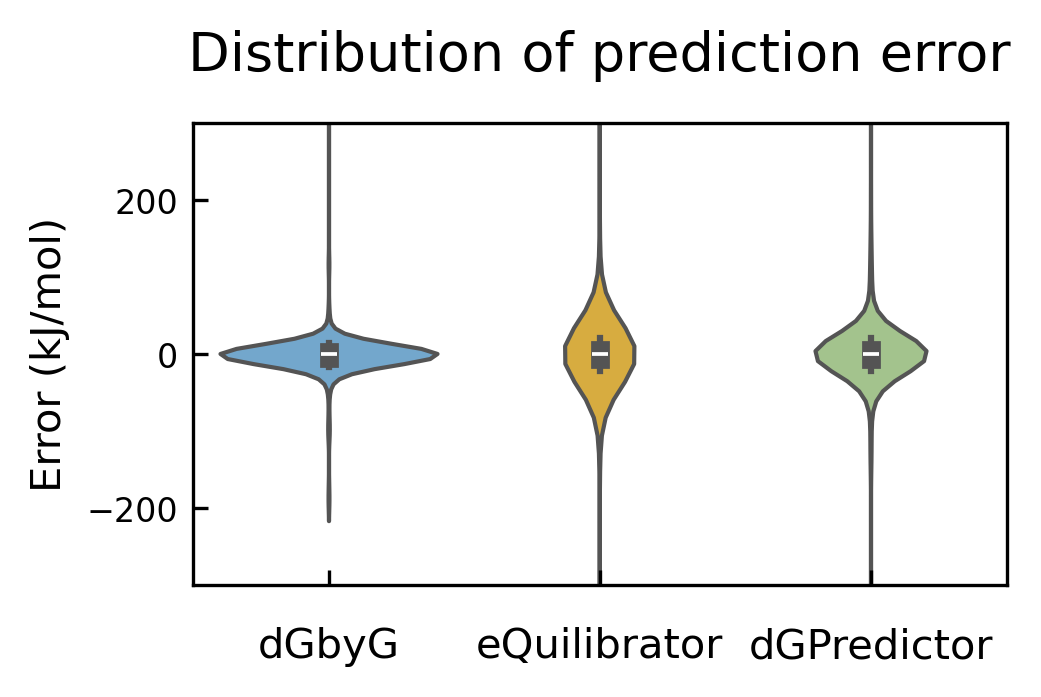

In [9]:
df1 = pd.DataFrame(data={'e':e, 'tool':'dGbyG'})
df2 = pd.DataFrame(data={'e':cc_e, 'tool':'eQuilibrator'})
df3 = pd.DataFrame(data={'e':af_e, 'tool':'dGPredictor'})
df = pd.concat([df1,df2,df3], axis=0, ignore_index=True)

plt.figure(dpi=300,figsize = (3.5,2))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax= plt.axes()
ax.xaxis.set_tick_params(pad=10)

plt.title(label='Distribution of prediction error', fontsize=13, x=0.5, y=1.06)
sns.violinplot(data=df, x='tool', y='e', hue='tool', palette=[color1, color2, color3], 
               bw_adjust=1.8, common_norm=True, linewidth=1, inner='box')
plt.yticks(fontsize = 8)
plt.xticks(ticks=[0,1,2],labels=['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize=10)

plt.ylabel('Error (kJ/mol)', fontsize=10)
plt.xlabel('')

plt.ylim(-300,300)
plt.show()

Fig 2.

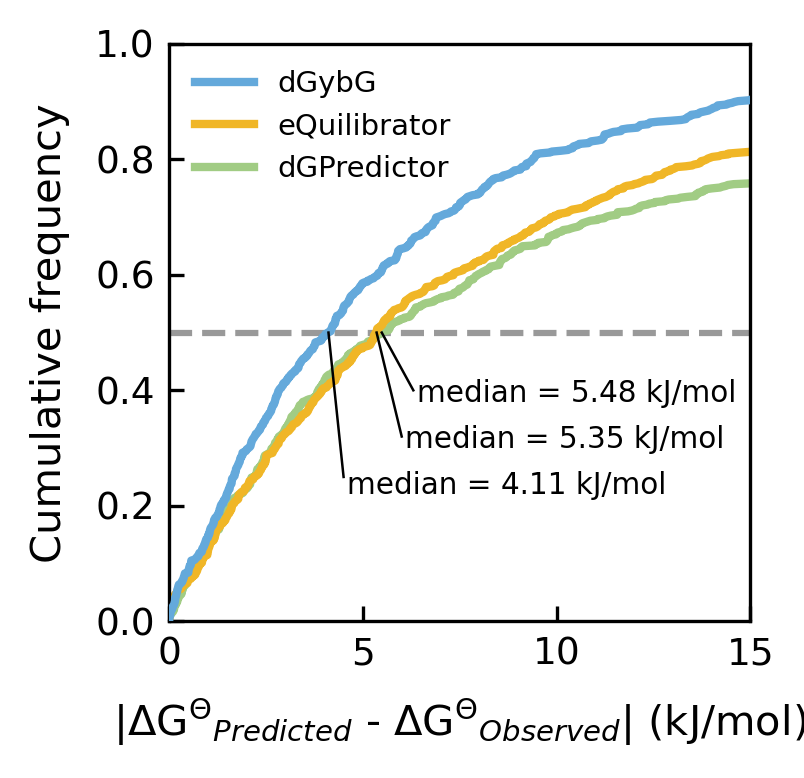

In [11]:
ae_sort = ae.to_numpy()
ae_sort.sort()
density = np.arange(1,len(ae_sort)+1)/len(ae_sort)

cc_ae_sort = cc_ae.to_numpy()
cc_ae_sort.sort()
cc_density = np.arange(1,len(cc_ae_sort)+1)/len(cc_ae_sort)

af_ae_sort = af_ae.to_numpy()
af_ae_sort.sort()
af_density = np.arange(1,len(af_ae_sort)+1)/len(af_ae_sort)

plt.figure(dpi=300, figsize=(2.5,2.5))

plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'

#plt.title(label='Cumulative distributions of\nabsolute prediction error', fontsize=10, x=0.5, y=1.01)

# dgbyg
l0, = plt.plot(ae_sort, density, linewidth=2, c=color1, zorder = 3, label='dGybG')
plt.plot([np.median(ae),4.5], [0.5,0.25], linewidth =0.6, color = 'black', zorder=4)
plt.text(x=4.59, y = 0.22, s='median = {0} kJ/mol'.format(np.around(np.median(ae), decimals=2)), fontsize=7.1)

# cc
l1, = plt.plot(cc_ae_sort, cc_density, linewidth=2, c=color2, zorder=2, label='eQuilibrator')
plt.plot([np.median(cc_ae),6], [0.5,0.32], linewidth=0.6, color='black', zorder=4)
plt.text(x = 6.09, y = 0.30, s='median = {0} kJ/mol'.format(np.around(np.median(cc_ae_sort), decimals=2)), fontsize=7.1)

# dGPredictor
l2, = plt.plot(af_ae_sort, af_density, linewidth=2, c=color3, zorder = 1, label='dGPredictor')
plt.plot([np.median(af_ae),6.3], [0.5,0.40], linewidth =0.6, color = 'black', zorder=4)
plt.text(x = 6.39, y = 0.38, s='median = {0} kJ/mol'.format(np.around(np.median(af_ae_sort), decimals=2)), fontsize=7.1)

plt.axhline(y=0.5, c = 'gray', linestyle = '--', linewidth=1.5, zorder=0, alpha=0.8)

plt.legend(handles=[l0,l1,l2], fontsize=7, frameon=False, )

plt.xlabel(r'|$\Delta$G$^{0}$$_{1}$ - $\Delta$G$^{0}$$_{2}$| (kJ/mol)'.format(chr(920),'{Predicted}', '{Observed}'), fontsize=10, labelpad=6)
plt.ylabel(r'Cumulative frequency', fontsize=10, labelpad=6)

plt.xticks(fontsize=9)
plt.yticks(fontsize=9)

plt.xlim(0,15)
plt.ylim(0,1)
plt.show()

Fig 3.

In [12]:
results_dir = '../data/results_data/cross_validation_results/5_fold_cross_validation/'

Final_p_5 = []
for n in range(20):
    name = os.path.join(results_dir, str(n))
    idx = np.load( name+'.npy').mean(axis=0).argmin()
    res = pd.read_csv(name+'.csv', index_col=0)
    assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
    
    Final_p_5.append(res.loc[:,str(idx)].to_numpy())

p_5 = np.mean(Final_p_5, axis=0)
e_5 = p_5 - real_r
ae_5 = np.abs(e_5)

print('Medain of absolute error:', np.median(ae_5))
print('Mean of absolute error:', np.mean(ae_5))
print('RMSE:', np.mean(ae_5**2)**0.5)

Medain of absolute error: 4.095632499999994
Mean of absolute error: 8.682208059884639
RMSE: 24.610695203559725


In [13]:
results_dir = '../data/results_data/cross_validation_results/2_fold_cross_validation/'

Final_p_2 = []
for n in range(20):
    name = os.path.join(results_dir, str(n))
    idx = np.load( name+'.npy').mean(axis=0).argmin()
    res = pd.read_csv(name+'.csv', index_col=0)
    assert np.isclose(real_r, res.loc[:,'standard_dg_prime']).all()
    
    Final_p_2.append(res.loc[:,str(idx)].to_numpy())

p_2 = np.mean(Final_p_2, axis=0)
e_2 = p_2 - real_r
ae_2 = np.abs(e_2)

print('Medain of absolute error:', np.median(ae_2))
print('Mean of absolute error:', np.mean(ae_2))
print('RMSE:', np.mean(ae_2**2)**0.5)

Medain of absolute error: 4.047028978468855
Mean of absolute error: 9.203856097633912
RMSE: 25.656536934390367


The linear model is: Y = -1.4792 + 0.99504X
PearsonRResult(statistic=0.9975875091064352, pvalue=0.0)
SignificanceResult(statistic=0.9293318309764578, pvalue=2.102580003885178e-293)
The linear model is: Y = -1.5599 + 0.9948X
PearsonRResult(statistic=0.9975904910642186, pvalue=0.0)
SignificanceResult(statistic=0.9281074869540612, pvalue=5.505354547905057e-291)
The linear model is: Y = -2.0968 + 0.99437X
PearsonRResult(statistic=0.9973859322029717, pvalue=0.0)
SignificanceResult(statistic=0.9226202695614125, pvalue=1.1908612805139482e-280)
The linear model is: Y = -3.7309e+11 + 3.245e+08X
PearsonRResult(statistic=0.021226238011239084, pvalue=0.5808465924765888)
SignificanceResult(statistic=0.8553350026142384, pvalue=1.5780057876145426e-195)
The linear model is: Y = -1.764e+11 + 4.1682e+08X
PearsonRResult(statistic=0.027605458755932146, pvalue=0.4726683309367915)
SignificanceResult(statistic=0.6887982870359016, pvalue=1.1952972731268794e-96)
The linear model is: Y = -1.131e+12 + -1.0732e+0

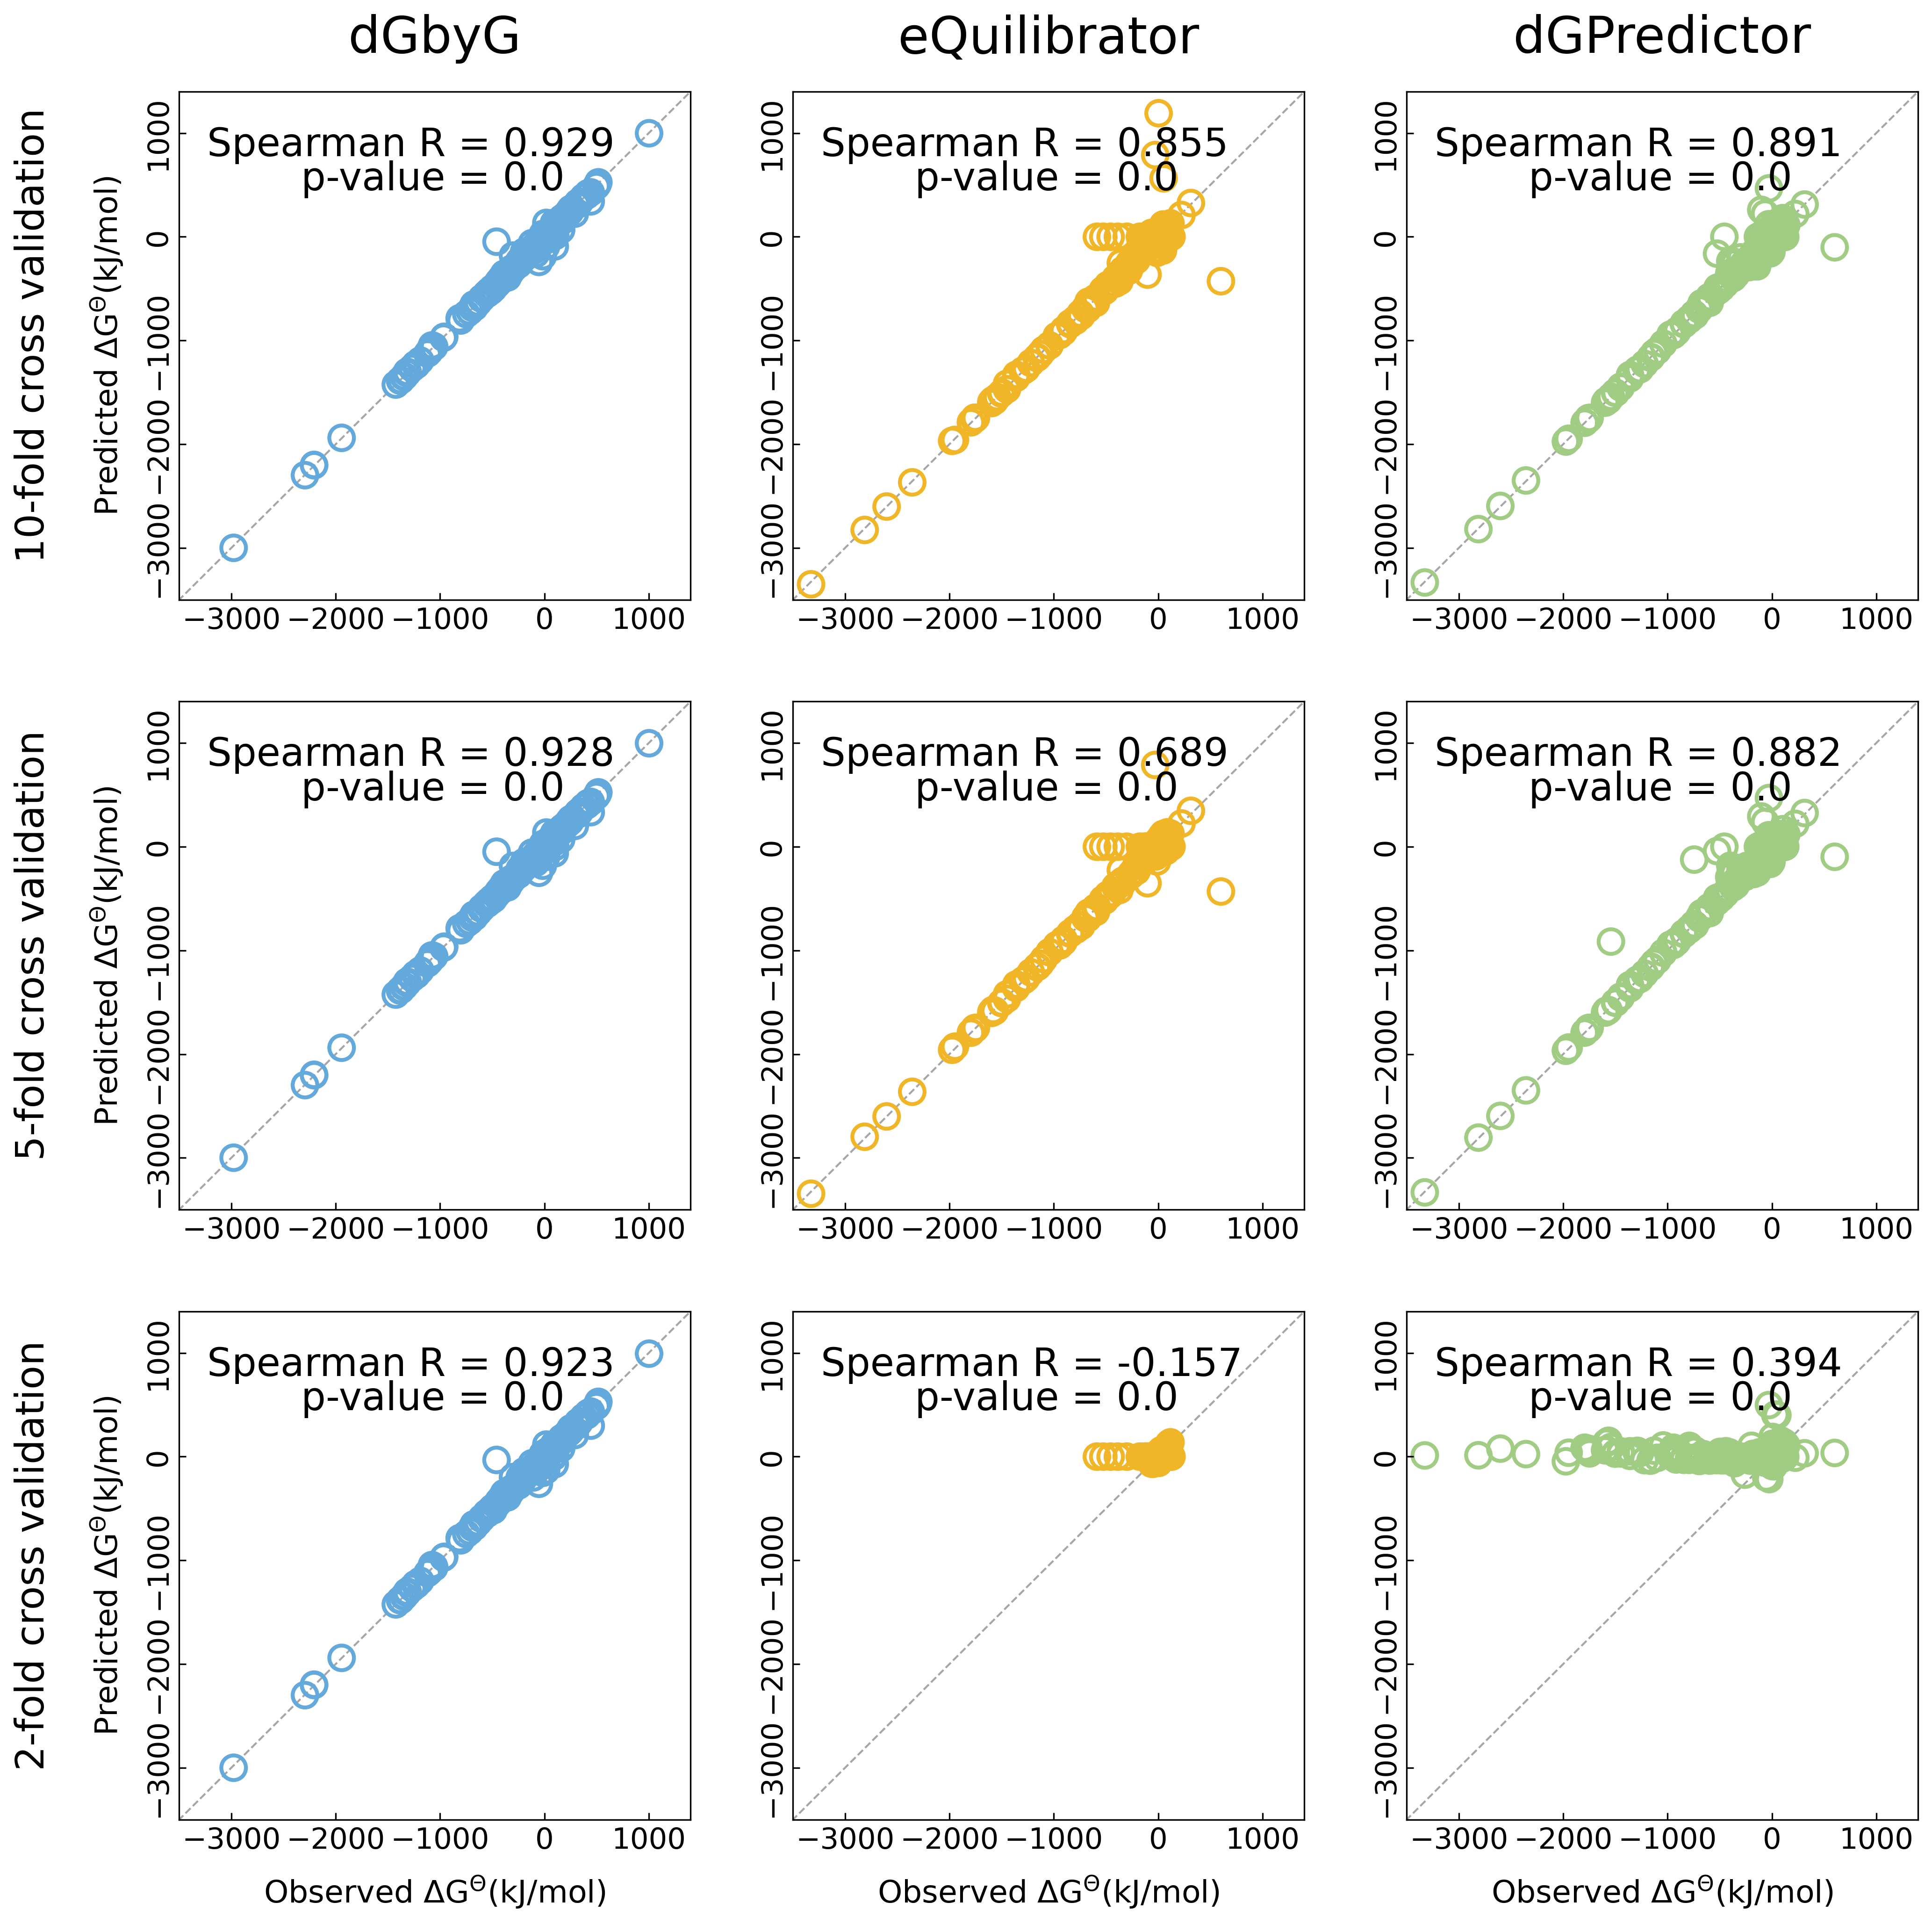

In [14]:
SR = []

plt.figure(dpi=300,figsize = (16,16))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
lable_fs = 16
title_fs = 26
text_fs = 20
R_x, R_y = (-3230, 780)
P_x, P_y = (-2330, 450)
ticks_fs = 15

# dGbyG 10-fold
plt.subplot(3,3,1)
plt.title('dGbyG', fontsize=title_fs, fontweight='normal', pad=20)
plt.text(s='10-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal',rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p)

plt.scatter(x=real_r, y=p, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y, linewidth = 2, color='gray', alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')
(255/256,134/256,250/256)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize = ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# dGbyG 5-fold
plt.subplot(3,3,4)
plt.text(s='5-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_5)

plt.scatter(x=real_r, y=p_5, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# dGbyG 2-fold
plt.subplot(3,3,7)
plt.text(s='2-fold cross validation', x=-4900, y=-950, fontsize=text_fs,fontweight='normal', rotation=90, ha='center', va='center')

fit_y, pr, sr = rapid_linear_reg(real_r, p_2)

plt.scatter(x=real_r, y=p_2, c='none', edgecolors=(100/256,170/256,220/256), s=160, linewidths=2)
#plt.plot(r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylabel(r'Predicted $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)
plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# CC 10-fold
plt.subplot(3,3,2)
plt.title('eQuilibrator', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['10 fold CV'])

plt.scatter(x=cc_r, y=cc['10 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# CC 5-fold CV
plt.subplot(3,3,5)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['5 fold CV'])

plt.scatter(x=cc_r, y=cc['5 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])


# CC 2-fold CV
plt.subplot(3,3,8)

fit_y, pr, sr = rapid_linear_reg(cc_r, cc['2 fold CV'])

plt.scatter(x=cc_r, y=cc['2 fold CV'], c='none', edgecolors=(241/256,183/256,39/256), s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

SR.append(sr[0])


# AF 10-fold CV
plt.subplot(3,3,3)
plt.title('dGPredictor', fontsize=title_fs, fontweight='normal',pad=20)

fit_y, pr, sr = rapid_linear_reg(af_r, af['10 fold CV'])

plt.scatter(x=af_r, y=af['10 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(af_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize = ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])

# AF 5-fold CV
plt.subplot(3,3,6)

fit_y, pr, sr = rapid_linear_reg(af_r, af['5 fold CV'])

plt.scatter(x=af_r, y=af['5 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

SR.append(sr[0])


# AF 2-fold CV
plt.subplot(3,3,9)

fit_y, pr, sr = rapid_linear_reg(af_r, af['2 fold CV'])

plt.scatter(x=af_r, y=af['2 fold CV'], c='none', edgecolors=color3, s=160, linewidths=2)
#plt.plot(cc_r, fit_y,c = 'gray',linewidth = 2 , alpha = 0.7)
plt.plot([-4000,1500], [-4000,1500], c='gray', linewidth=1 , alpha=0.7, zorder=0, linestyle='--')

plt.text(x=R_x, y=R_y, s='Spearman R = {0}'.format(np.around(sr[0], decimals=3)), fontsize = 20)
plt.text(x=P_x, y=P_y, s='p-value = {0}'.format(np.around(sr[1], decimals=3)), fontsize = 20)

plt.xticks(range(-3000, 1300, 1000), fontsize =ticks_fs)
plt.yticks(range(-3000, 1300, 1000), fontsize =ticks_fs, rotation=90, va='center')

plt.ylim(-3500,1400)
plt.xlim(-3500,1400)

plt.xlabel(r'Observed $\Delta$G$^{0}$(kJ/mol)'.format(chr(920)), fontsize=lable_fs, labelpad=10)

SR.append(sr[0])


plt.show()

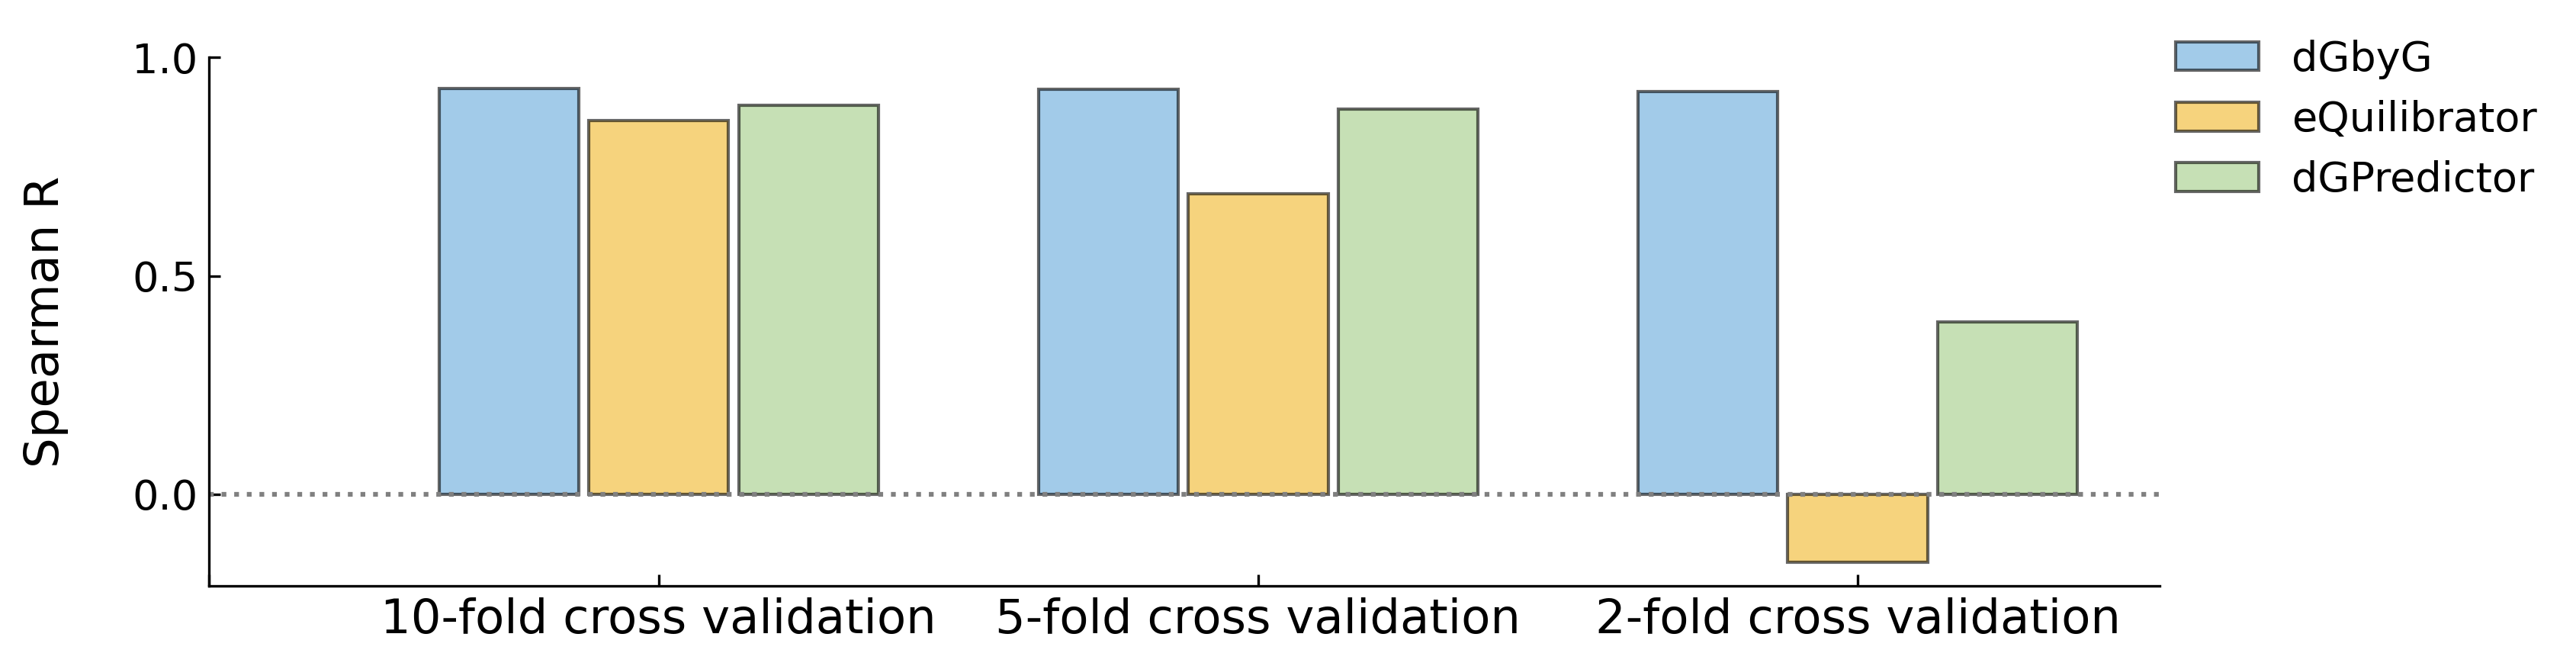

In [15]:
plt.figure(dpi=300,figsize = (11,3))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

colors = [color1,color2,color3,]
n = len(colors)

bar_width = 1.4/n

for i in range(n):
    center_point = 1.5 * ((2 * i + 1) / (2 * n) - 0.5)
    plt.bar(x=[1+center_point, 3+center_point, 5+center_point],height=SR[3*i:3*(i+1)], color=colors[i], edgecolor='black', width=bar_width, alpha=0.6, align='center')
#plt.bar(x=[1.02,3.02,5.02],height=R[3:6], color=color2, edgecolor='black', width=bar_width-0.02, alpha=0.6, align='edge')
#plt.bar(x=[1,2,3,4,5,6],height=R[6:9], color=color3)

#plt.ylabel(r'Median Absolute Error (kJ/mol)', fontsize=20)
plt.ylabel(r'Spearman R', fontsize = 15, labelpad=20)

plt.yticks([0, 0.5, 1.0], fontsize= 13)
plt.xticks([-0.5, 1,3,5], [None, '10-fold cross validation', '5-fold cross validation', '2-fold cross validation'], fontsize=15)

plt.legend(['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize = 13, frameon=False, loc=(1,0.7))

plt.axhline(y=0, linestyle=':', c='gray')

plt.show()

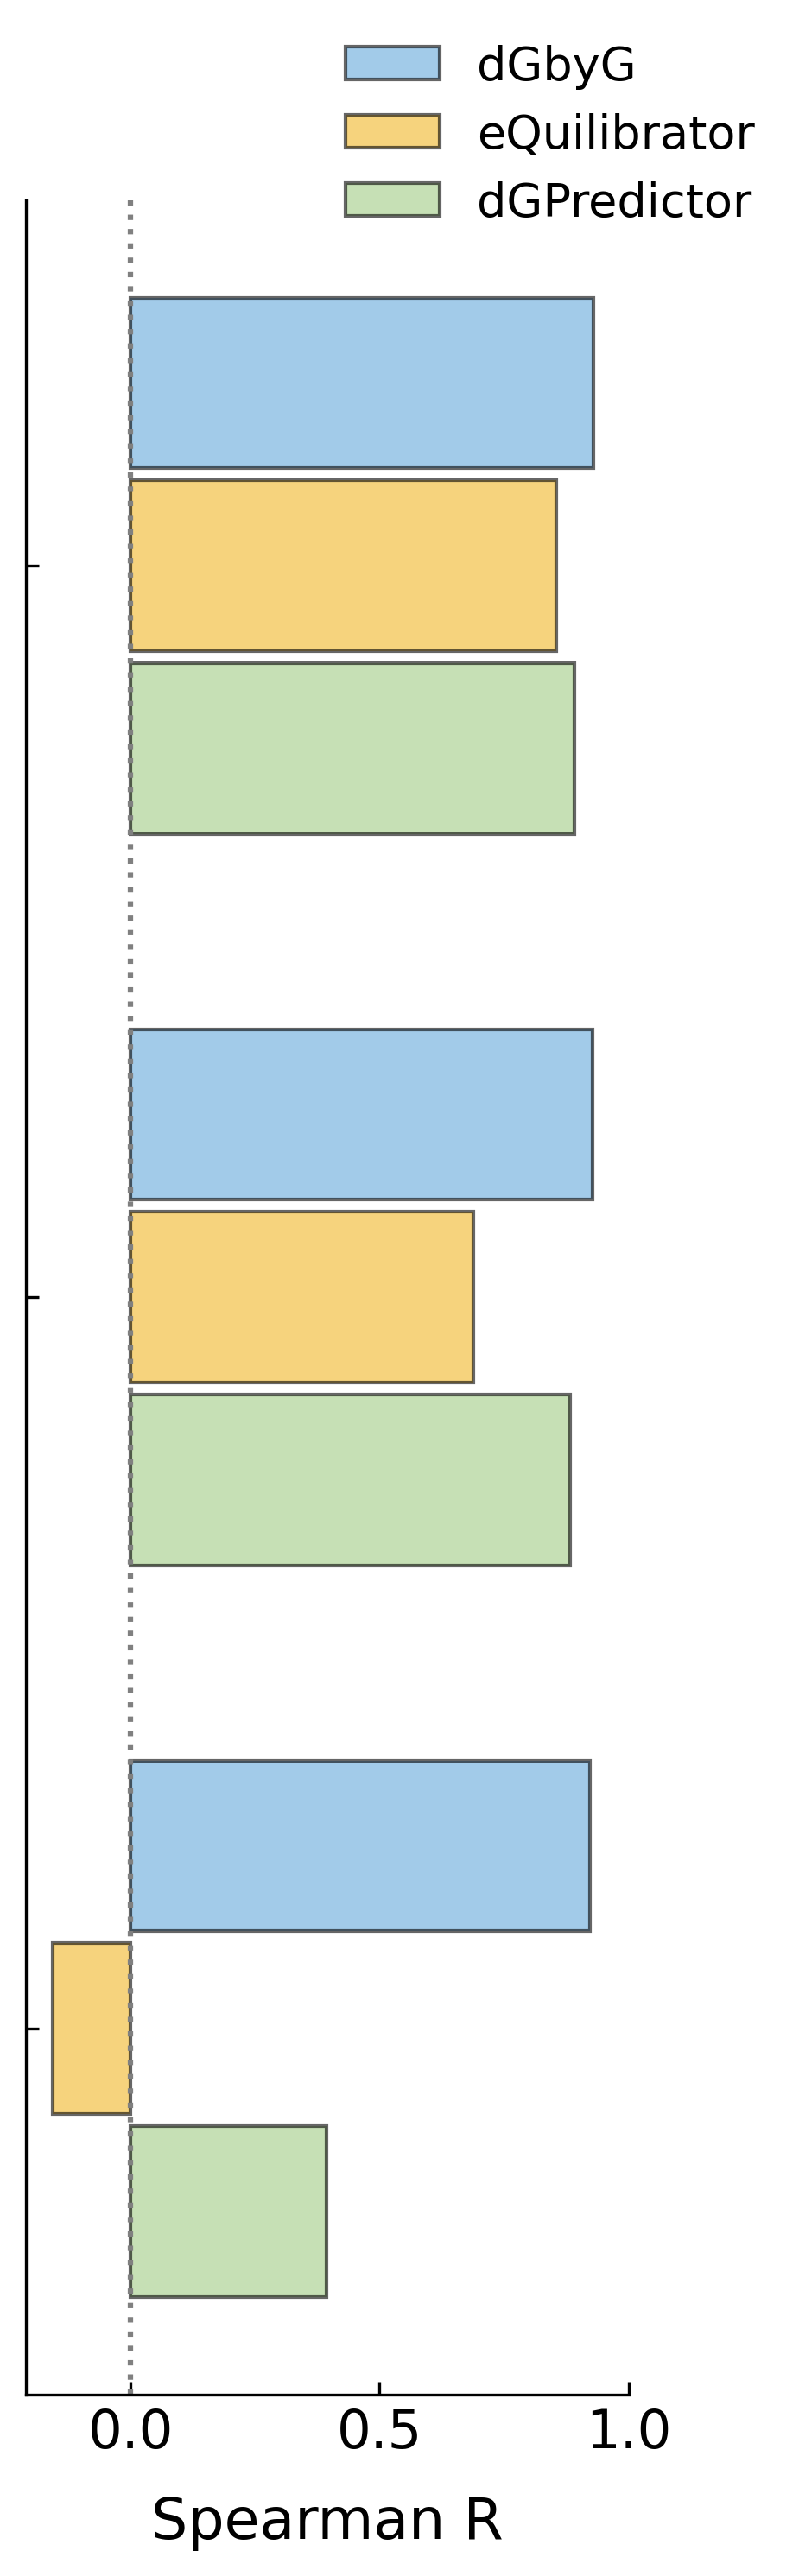

In [16]:
plt.figure(dpi=300,figsize = (3,11))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.invert_yaxis()
#ax.xaxis.set_ticks_position('top')
#ax.xaxis.set_label_position('top')
ax.set_xlabel

for i in range(n):
    center_point = 1.5 * ((2 * i + 1) / (2 * n) - 0.5)
    plt.barh(y=[1+center_point, 3+center_point, 5+center_point], width=SR[3*i:3*(i+1)], color=colors[i], edgecolor='black', height=bar_width, alpha=0.6, align='center')

plt.legend(['dGbyG', 'eQuilibrator', 'dGPredictor'], fontsize = 13, frameon=False, loc=(0.5,0.98))

plt.plot([0,0],[0,6], linestyle=':', c='gray')
plt.ylim(6,0)
plt.xlabel(r'Spearman R', fontsize =lable_fs, labelpad=10)

plt.xticks([0, 0.5, 1.0], fontsize=ticks_fs)
plt.yticks([1,3,5], [None,None,None], fontsize=13, rotation=90, va='center')


plt.show()

Reading Recon3D transformed standard dGr prime 

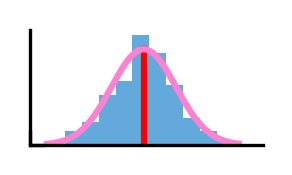

In [ ]:
from scipy.stats import norm
ps = Final_p.T[600]

plt.figure(dpi=300, figsize=(1,0.5))
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.hist(ps, bins=10, density=True, color=color1)

interval = ps.std()*6
x = np.array([interval/100*i + (ps.mean()-interval/2) for i in range(100)])
y = norm.pdf(x ,ps.mean(), ps.std())

plt.plot([ps.mean(),ps.mean()], [0,max(y)], color='red')
plt.plot(x, y, color=color4, alpha=1)

plt.xticks([-30], [None])
plt.yticks([0], [None])
plt.xlim(-30,-19)
plt.show()

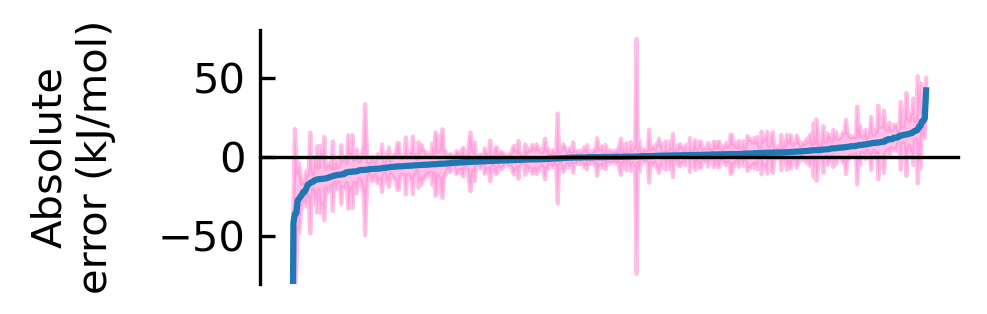

0.8915929203539823


In [38]:
df = pd.DataFrame(data=[real_r.to_numpy(), p, p-real_r, np.std(Final_p, axis=0), np.std(R, axis=0)]).T.iloc[223:,:]
df = df.sort_values(by=2)

plt.figure(dpi=300, figsize=(3,1.1))
plt.rcParams['xtick.direction'] = 'in'
plt.rcParams['ytick.direction'] = 'in'
ax=plt.axes()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_position(('data',0))


plt.plot(range(df.shape[0]), df.iloc[:,2])
#plt.plot(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+10, color=color4)
#plt.plot(range(df.shape[0]), df.iloc[:,2]-df.iloc[:,3]*2-10, color=color3)
plt.fill_between(range(df.shape[0]), df.iloc[:,2]+df.iloc[:,3]*2+df.iloc[:,4]*2, df.iloc[:,2]-df.iloc[:,3]*2-df.iloc[:,4]*2,color=color4, alpha=0.5)

plt.ylabel('Absolute\nerror (kJ/mol)'.format(chr(920)), fontsize=10, labelpad=10)

plt.ylim(-80,80)
plt.xticks([])
plt.show()

print(sum(abs(df.iloc[:,2]<=df.iloc[:,3]*2+df.iloc[:,4]*2))/df.shape[0])